In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [87]:
df = pd.read_csv(r'/Users/niruoxi/Desktop/DMPProject/Filtered data/customers_2020ss.csv')
articles = pd.read_csv(r'/Users/niruoxi/Desktop/DMPProject/Filtered data/articles_2020ss.csv')
transactions = pd.read_csv(r'/Users/niruoxi/Desktop/DMPProject/Filtered data/transactions_2020ss.csv')

In [88]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year,Month
0,2020-03-01,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,751628002,0.022017,1,2020,3
1,2020-03-01,0008968c0d451dbc5a9968da03196fe20051965edde741...,675662028,0.035576,2,2020,3
2,2020-03-01,001127bffdda108579e6cb16080440e89bf1250a776c6e...,821152004,0.025407,2,2020,3
3,2020-03-01,001127bffdda108579e6cb16080440e89bf1250a776c6e...,860738001,0.025407,2,2020,3
4,2020-03-01,00117f79ce61af038e143ee26448e8401fdbff51f48d5a...,822957002,0.045746,2,2020,3


## Data Cleaning

customer_id                    0
FN                        454932
Active                    459841
club_member_status          1128
fashion_news_frequency      2983
age                         4616
postal_code                    0
dtype: int64


<AxesSubplot:>

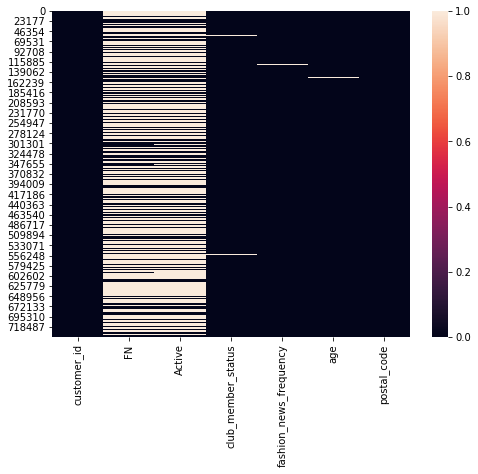

In [89]:
print(df.isnull().sum())
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [90]:
print(df.isnull().sum()/len(df)*100)

customer_id                0.000000
FN                        61.339615
Active                    62.001507
club_member_status         0.152091
fashion_news_frequency     0.402205
age                        0.622387
postal_code                0.000000
dtype: float64


In [94]:
df.fashion_news_frequency.value_counts()/len(df.fashion_news_frequency)

NONE         0.608281
Regularly    0.387421
Monthly      0.000276
Name: fashion_news_frequency, dtype: float64

In [17]:
df = df.drop(columns = ['FN','Active','fashion_news_frequency'])


# club_member_status: less than 1% are missing -> fillna with "Other"
df.club_member_status.fillna('Other',inplace = True)

# age: less than 1% are missing -> fillna with mode/mean/median?
df.age.fillna(customers.age.mode()[0], inplace=True)

#### Get gender

In [95]:
articles.index_group_name.unique()

array(['Ladieswear', 'Sport', 'Baby/Children', 'Menswear', 'Divided'],
      dtype=object)

In [96]:
merge1 = transactions.merge(articles[['article_id','index_group_name']],on='article_id')[['customer_id','index_group_name']]

In [97]:
merge1.index_group_name.value_counts()

Ladieswear       5480032
Divided          1727478
Menswear          435270
Sport             324934
Baby/Children     135936
Name: index_group_name, dtype: int64

In [98]:
merge1.groupby('customer_id').index_group_name.apply(list)

customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    [Ladieswear, Ladieswear, Ladieswear, Ladieswea...
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa    [Ladieswear, Ladieswear, Ladieswear, Divided, ...
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    [Menswear, Ladieswear, Menswear, Menswear, Men...
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a    [Ladieswear, Ladieswear, Ladieswear, Sport, La...
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2    [Ladieswear, Ladieswear, Ladieswear, Ladieswea...
                                                                                          ...                        
ffff8f9ecdce722b5bab97fff68a6d1866492209bfe5242c50d2a10a652fb5ef                 [Ladieswear, Ladieswear, Ladieswear]
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831    [Ladieswear, Ladieswear, Ladieswear, Ladieswea...
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fa

In [104]:
mapping_weights = {'Ladieswear':2, 'Sport':0, 'Baby/Children':1.5, 'Menswear':1, 'Divided':0}
merge1['weights'] = merge1.index_group_name.map(mapping_weights)

merge2 = merge1.groupby('customer_id').weights.mean().reset_index()
merge2['gender'] = merge2.weights.map( lambda x: 'Female' if x >= 1.5 else 'Male')
df = df.merge(merge2[['customer_id','gender']], on='customer_id')

## EDA

In [105]:
df['age_bins'] = pd.cut(df.age, [15,20,25,30,35,45,55,65,100],
                              labels = ['15-20','20-25','25-30','30-35','35-45','45-55','55-65','65-100'])
vis_age_df = df.age_bins.value_counts().reset_index().rename(columns = {'index':'age group','age_bins':'cnt'})
vis_age_df

,age group,cnt
0,20-25,170006
1,45-55,133910
2,25-30,131418
3,35-45,79603
4,15-20,78083
5,30-35,68295
6,55-65,59921
7,65-100,15809


Text(0.5, 1.0, 'Distribution of Customer Age')

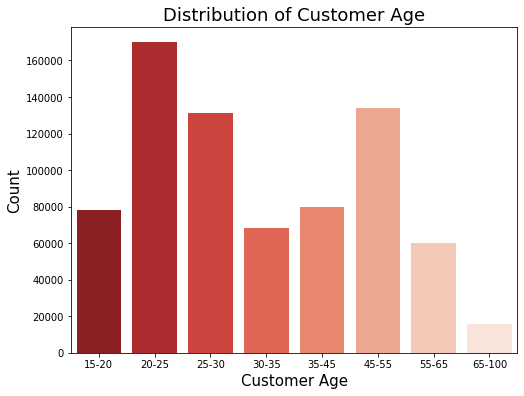

In [109]:
f, ax = plt.subplots(figsize=(16,8))

sns.barplot(data=vis_age_df, x='age group',y = 'cnt', palette = 'Reds_r')
ax.set_xlabel('Customer Age',size = 15)
ax.set_ylabel('Count',size = 15)
ax.set_title('Distribution of Customer Age', size = 18)

In [69]:
pie = df[['customer_id', 'gender']].groupby('gender').count()

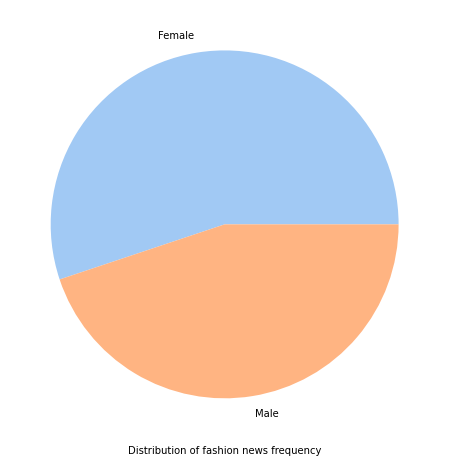

In [70]:
f, ax = plt.subplots(figsize=(16,8))
colors = sns.color_palette('pastel')
ax.pie(pie.customer_id, labels=pie.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

In [75]:
status = pd.DataFrame(df.groupby('club_member_status')['customer_id'].count().reset_index().rename({'customer_id': 'count'}, axis=1))
fig = px.bar(long_df, x="club_member_status", y="count", color="club_member_status",title = 'Bar plot for Club Member Status')
fig.show()

In [81]:
customers

,customer_id,club_member_status,age,postal_code,gender,age_bins
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,Female,45-55
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,Female,20-25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,Male,20-25
3,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,Male,45-55
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,ACTIVE,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,Female,30-35
...,...,...,...,...,...,...
741656,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,ACTIVE,52.0,0de9d1ec7dc785301ca5fbe8949cfc2cfbd77e7a807270...,Female,45-55
741657,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,ACTIVE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,Female,20-25
741658,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,ACTIVE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,Male,20-25
741659,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,ACTIVE,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,Male,20-25


Text(0, 0.5, 'Count')

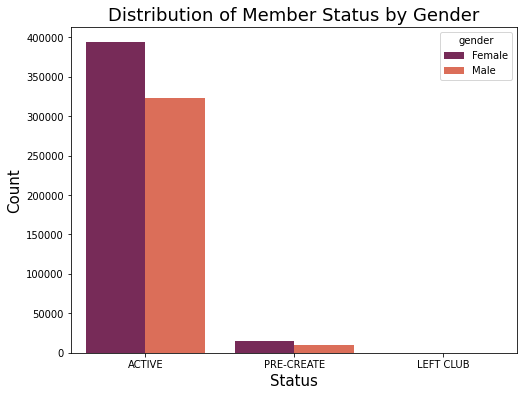

In [117]:
f, ax = plt.subplots(figsize=(8,6))
sns.countplot(x = 'club_member_status',  data = df, hue = 'gender',palette = 'rocket')
ax.set_title('Distribution of Member Status by Gender', size = 18)
ax.set_xlabel('Status',size = 15)
ax.set_ylabel('Count',size = 15)